<a href="https://colab.research.google.com/github/KORALLLL/summer_practice/blob/main/projects/Classification_type_net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Создание классифицирующей нейронной сети

Будем использовать датасет wine для классификации вин. В данной версии нейросети будем классифицировать по первому признаку.

## importation modules

In [3]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch
import random
import numpy as np
from tqdm import tqdm_notebook as tqdm

## dataset

In [4]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

wine = sklearn.datasets.load_wine()

x_train, x_test, y_train, y_test = train_test_split(
    wine.data[:, :2],
    wine.target,
    test_size = 0.3,
    shuffle = True
)
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

## construction net

In [5]:
class Net(torch.nn.Module):
  def __init__(self, nn_hidden_neurons):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(2, nn_hidden_neurons)
    self.act1 = torch.nn.Sigmoid()
    self.fc2 = torch.nn.Linear(nn_hidden_neurons, nn_hidden_neurons)
    self.act2 = torch.nn.Sigmoid()
    self.fc3 = torch.nn.Linear(nn_hidden_neurons, 3)
    self.softmax = torch.nn.Softmax(dim = 1)

  def forward(self, x):
    x = self.fc1(x)
    x = self.act1(x)
    x = self.fc2(x)
    x = self.act2(x)
    x = self.fc3(x)
    return(x)

  def inference(self, x):
    x = self.forward(x)
    x = self.softmax(x)
    return x

wine_net = Net(9)

## loss function

In [6]:
loss = torch.nn.CrossEntropyLoss()

## optimizer

In [7]:
optimizer = torch.optim.Adam(wine_net.parameters(), lr = 0.001)

## training procedure

In [77]:
batch = 100

for epoch in tqdm(range(10000), desc = 'learning'):
  order = np.random.permutation(len(x_train))

  for start_index in range(0, len(x_train), batch):
    optimizer.zero_grad()

    batch_indexes = order[start_index:start_index + batch]

    x_batch = x_train[batch_indexes]
    y_batch = y_train[batch_indexes]

    preds = wine_net.forward(x_batch)
    loss_val = loss(preds, y_batch)
    loss_val.backward()

    optimizer.step()

<ipython-input-77-77e977316cbc>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for epoch in tqdm(range(10000), desc = 'learning'):


learning:   0%|          | 0/10000 [00:00<?, ?it/s]

## visualisation

<ipython-input-76-d650adc3593a>:25: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x_train[indexes, 0],


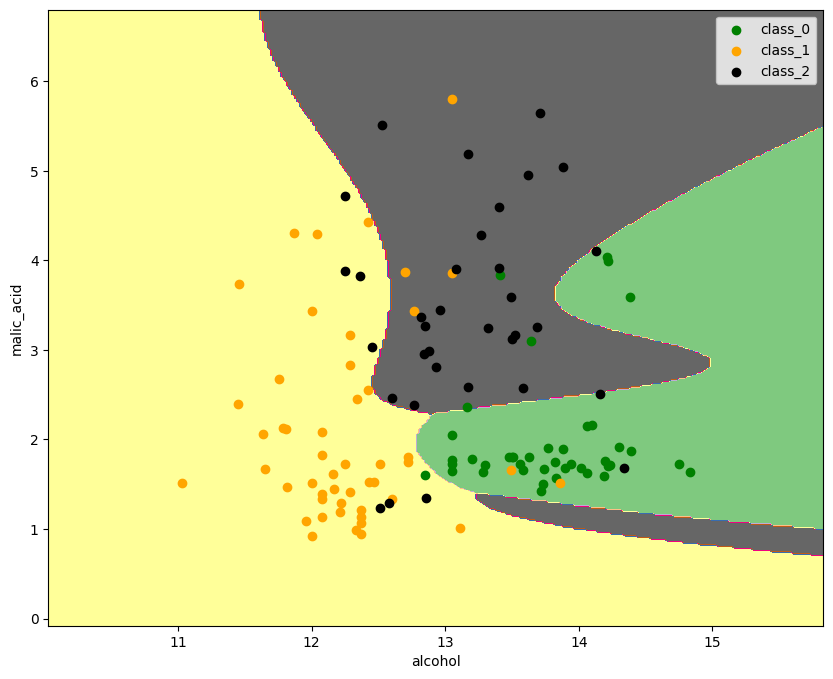

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 8)

n_classes = 3
plot_colors = ['g', 'orange', 'black']
plot_step = 0.02

x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1

xx, yy =  torch.meshgrid(torch.arange(x_min, x_max, plot_step),
                         torch.arange(y_min, y_max, plot_step))

preds = wine_net.inference(
    torch.cat([xx.reshape(-1, 1), yy.reshape(-1, 1)], dim=1))

preds_class = preds.data.numpy().argmax(axis=1)
preds_class = preds_class.reshape(xx.shape)
plt.contourf(xx, yy, preds_class, cmap='Accent')

for i, color in zip(range(n_classes), plot_colors):
    indexes = np.where(y_train == i)
    plt.scatter(x_train[indexes, 0],
                x_train[indexes, 1],
                c=color,
                label=wine.target_names[i],
                cmap='Accent')
    plt.xlabel(wine.feature_names[0])
    plt.ylabel(wine.feature_names[1])
    plt.legend()

## accuracy

In [78]:
x = np.concatenate([x_train.numpy(), x_test.numpy()])
y = torch.from_numpy(np.concatenate([y_train.numpy(), y_test.numpy()]))
predicts = wine_net.inference(torch.from_numpy(x))
predicts = predicts.argmax(dim = 1)
sum(predicts == y)/ len(predicts)

tensor(0.8483)